In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import circlify
from pypalettes import create_cmap
from matplotlib.colors import Normalize
from pyfonts import load_google_font

In [2]:
euroleague_basketball = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-10-07/euroleague_basketball.csv")

In [3]:
euroleague_basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Team                            20 non-null     object
 1   Home city                       20 non-null     object
 2   Arena                           20 non-null     object
 3   Capacity                        20 non-null     object
 4   Last season                     19 non-null     object
 5   Country                         20 non-null     object
 6   FinalFour_Appearances           20 non-null     int64 
 7   Titles_Won                      20 non-null     int64 
 8   Years_of_FinalFour_Appearances  9 non-null      object
 9   Years_of_Titles_Won             7 non-null      object
dtypes: int64(2), object(8)
memory usage: 1.7+ KB


In [4]:
euroleague_basketball.head(2)

,Team,Home city,Arena,Capacity,Last season,Country,FinalFour_Appearances,Titles_Won,Years_of_FinalFour_Appearances,Years_of_Titles_Won
0,Anadolu Efes,Istanbul,Basketball Development Center,"10,000",6th,Turkey,5,2,"2000, 2001, 2019, 2021, 2022","2021, 2022"
1,Barcelona,Barcelona,Palau Blaugrana,"7,585",5th,Spain,0,0,NaN,NaN


In [5]:
df = euroleague_basketball[["Team", "FinalFour_Appearances", "Titles_Won"]].copy()

In [6]:
# Create size for circles
df["bubbler"] = df["FinalFour_Appearances"].apply(lambda x: x + 1 if x == 0 else x * 2)

In [7]:
# Create success rate (proportion of titles won when they make it to the final four)
df["succes_rate"] = df["Titles_Won"] / df["FinalFour_Appearances"]

In [8]:
# Sort values in descending order
df = df.sort_values(by="bubbler", ascending=False, ignore_index=True)

In [9]:
df.head()

,Team,FinalFour_Appearances,Titles_Won,bubbler,succes_rate
0,Olympiacos,14,3,28,0.214286
1,Panathinaikos,13,7,26,0.538462
2,Real Madrid,12,6,24,0.500000
3,Fenerbahce,7,2,14,0.285714
4,Anadolu Efes,5,2,10,0.400000


In [10]:
# Circle positions
circles = circlify.circlify(
    df["bubbler"].tolist(),
    show_enclosure=False,
    #show_enclosure=True,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# Reverse the order of the circles to match the dataframe
circles = circles[::-1]

In [11]:
# Create cmap
my_cmap = create_cmap(    
    colors=["#ffe5b0", "#FC5A00"],
    cmap_type="continuous",
)

In [12]:
# Circles positions
print(circles)

[Circle(x=0.5374124701123253, y=-0.1894678104856846, r=0.38194067484501615, level=1, ex={'datum': 28}), Circle(x=-0.2125754482368233, y=-0.1894678104856846, r=0.3680472435041324, level=1, ex={'datum': 26}), Circle(x=0.1489212452339171, y=0.43511760526986293, r=0.35360835369220844, level=1, ex={'datum': 24}), Circle(x=0.15046873003870673, y=-0.7142498291517597, r=0.27007284119387714, level=1, ex={'datum': 14}), Circle(x=-0.4288481007436503, y=0.36623028345271097, r=0.22825321082162425, level=1, ex={'datum': 10}), Circle(x=0.7031817048167228, y=0.37269740571616305, r=0.20415587819189698, level=1, ex={'datum': 8}), Circle(x=-0.2962008780096262, y=-0.7278634435966755, r=0.17680417684610422, level=1, ex={'datum': 6}), Circle(x=-0.5687004803593441, y=-0.5578916842044552, r=0.14436000588858514, level=1, ex={'datum': 4}), Circle(x=-0.654569299517829, y=0.06976687982407175, r=0.14436000588858514, level=1, ex={'datum': 4}), Circle(x=-0.908971348869313, y=-0.1860672831831399, r=0.0721800029442925

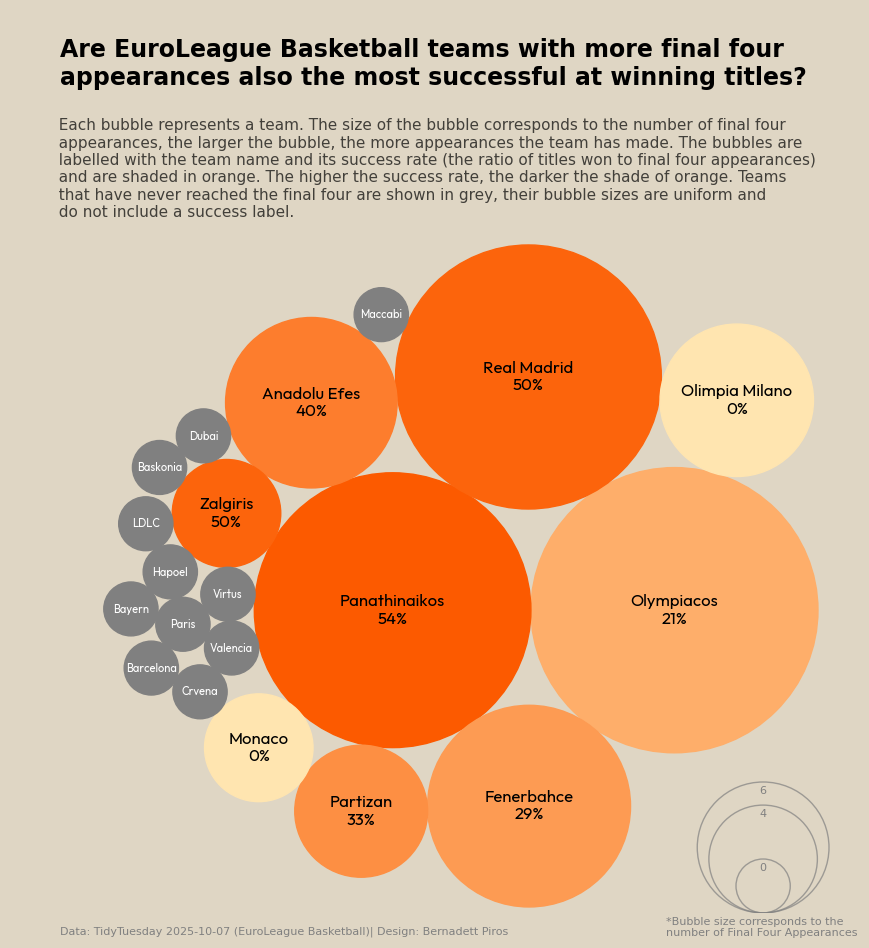

In [13]:
# Create figure 
fig, ax = plt.subplots(figsize=(10, 10))

# Parameters
labels = df["Team"]
sizes = df["bubbler"]
rates = df["succes_rate"]

font = load_google_font("Outfit")

# Normalize rate values 
norm = Normalize(vmin=min(rates), vmax=max(rates))

for circle, label, size, rate in zip(circles, labels, sizes, rates):
    x, y, r = circle    
    
    if size == 1:
        label = label.split()[0]  # Get the first word of the team label      
        color = "grey"  
        fontsize = 8 
        textcolor ="white"
    else:        
        color = my_cmap(norm(rate))  # Normalize rate to color
        fontsize = 12  
        textcolor ="black"
        label = f"{label}\n{rate*100:.0f}%"  

    # Add the coloured circle patch 
    ax.add_patch(plt.Circle((x, y), r, color=color))      
    
    # Annotation
    ax.annotate(
        label,
        (x, y),
        va="center",
        ha="center",
        fontsize=fontsize,
        color=textcolor,
        font=font
    )

# Axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r + 0.05,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# Remove axes
ax.axis("off")

# Add child axes
child_ax = ax.inset_axes([0.75, 0.015, 0.25, 0.2])
child_ax.set_xlim(-0.25, 0.25)
child_ax.set_ylim(0, 0.4)
radius=[0.07, 0.14, 0.17] # Radius of 0, 4, 6 sizes
sis = [0, 4, 6]
for rad, si in zip(radius, sis):  
    circle = plt.Circle((0, rad), radius=rad, color="none", ec="grey", alpha=0.7)  
    child_ax.add_artist(circle)       
    child_ax.annotate(
        f"{si}",  # Label of number of final four apperances 
        (0, rad + rad - 0.01),  # Position to the circle
        va="top",      
        ha="center",      
        fontsize=8,      
        color="grey"     
    )    
child_ax.text(-0.25, -0.06, "*Bubble size corresponds to the\nnumber of Final Four Appearances", color='grey', size=8)
child_ax.axis("off")

fig.set_facecolor("#DFD6C4")

# Title
fig.text(0.1, 0.95, "\nAre EuroLeague Basketball teams with more final four\nappearances also the most successful at winning titles?",
        size=17, weight="bold", ha="left")

txt = ''' 
          Each bubble represents a team. The size of the bubble corresponds to the number of final four
          appearances, the larger the bubble, the more appearances the team has made. The bubbles are
          labelled with the team name and its success rate (the ratio of titles won to final four appearances)
          and are shaded in orange. The higher the success rate, the darker the shade of orange. Teams
          that have never reached the final four are shown in grey, their bubble sizes are uniform and
          do not include a success label.
     '''

fig.text(0.05, 0.8, txt, alpha=0.7, size=11, ha="left")

fig.text(0.1, 0.1, "Data: TidyTuesday 2025-10-07 (EuroLeague Basketball)| Design: Bernadett Piros", size=8, color="grey")

# Show the plot
plt.show()

#fig.savefig("2025-10-07.png", bbox_inches='tight', pad_inches=0.2)